<img src="../logo_UTN.svg" align="right" width="150" /> 

#### Teoría de los Circuitos 2

# Trabajo semanal 7
#### Lugano Damian

-------------------------

#### Ejercicio 2 Guia

##### Consigna

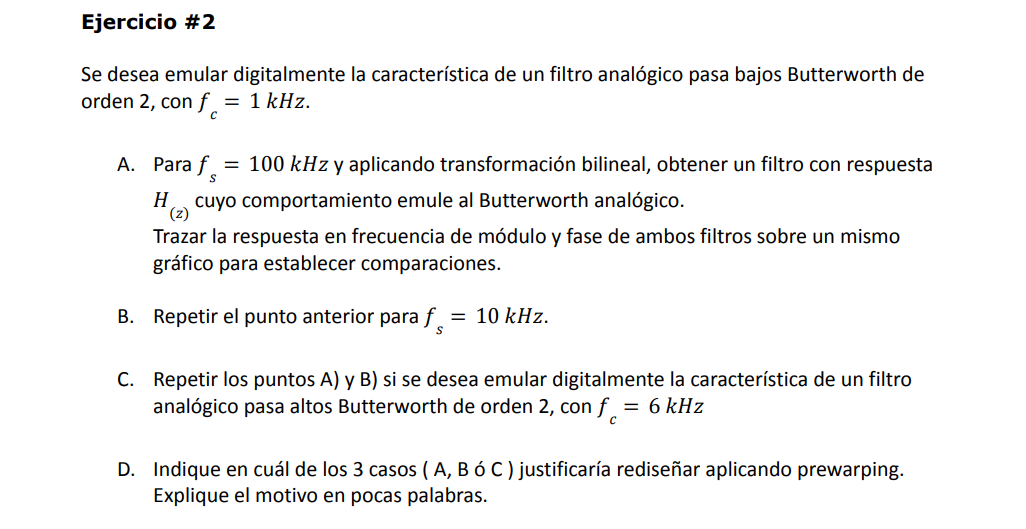

##### Desarrollo

#### Simulación en python


a) 
+ fs=100KHz
+ fc=1KHz

In [25]:
import scipy.signal as sig
from pytc2.sistemas_lineales import analyze_sys
import matplotlib.pyplot as plt
import numpy as np

In [26]:
order=2

z,p,k=sig.buttap(order)
num,den=sig.zpk2tf(z,p,k)
Tf=sig.TransferFunction(num,den)

In [27]:
zz,pz,kz=sig.bilinear_zpk(z,p,k,fs=100)
numz,denz=sig.zpk2tf(zz,pz,kz)
Tfz=sig.TransferFunction(numz,denz,dt=1/100)

In [28]:
all_sys=[]

all_sys.append(Tf)
all_sys.append(Tfz)

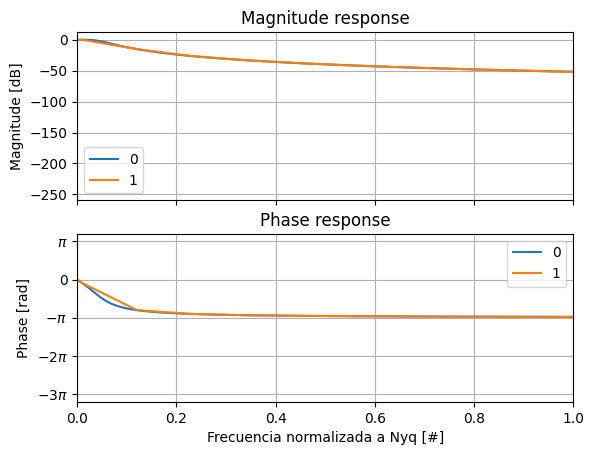

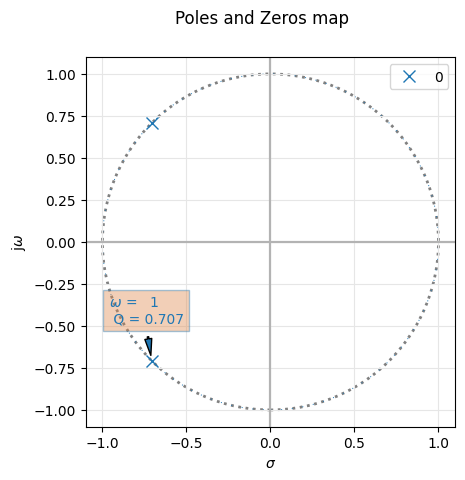

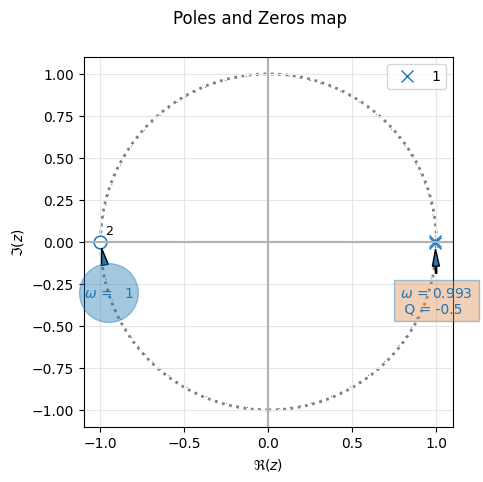

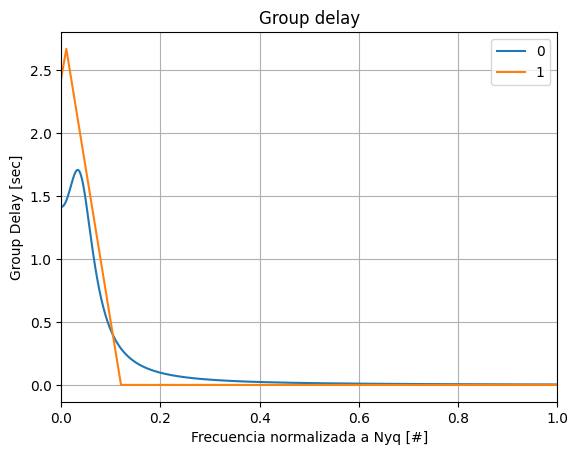

In [29]:
analyze_sys(all_sys, digital=True)

b)

+ fs=10KHz
+ fc=1KHz

In [30]:
zz,pz,kz=sig.bilinear_zpk(z,p,k,fs=10)
numz,denz=sig.zpk2tf(zz,pz,kz)
Tfz=sig.TransferFunction(numz,denz, dt=1/10)

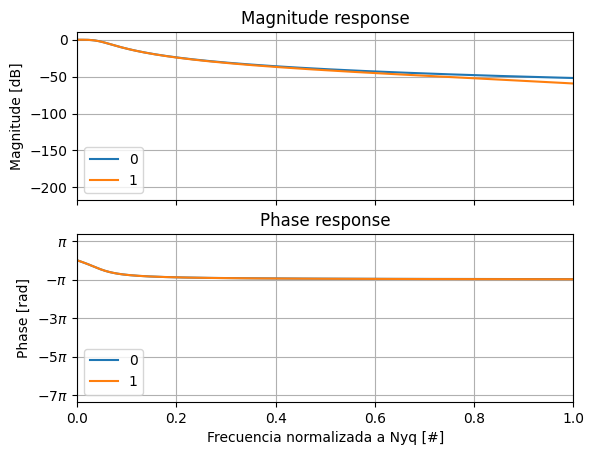

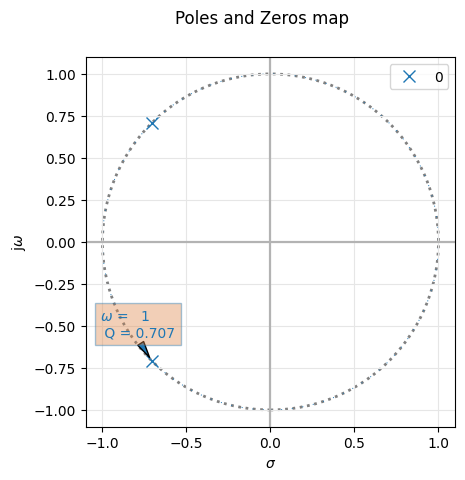

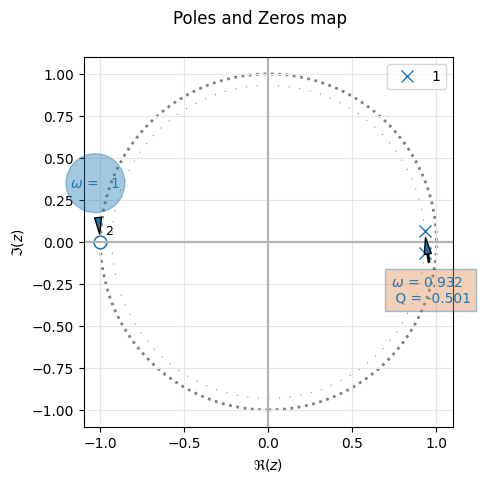

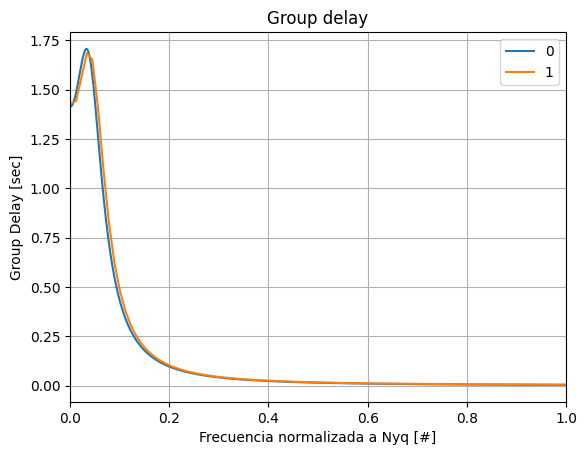

In [31]:
all_sys=[]

all_sys.append(Tf)
all_sys.append(Tfz)
analyze_sys(all_sys, digital=True)

c) 

En este caso fc=6KHz

a- $K = 2fs = 2 \frac{fc}{fs}=2 \times 16.67 = 33.33$

b- $K = 2fs = 2 \frac{fc}{fs}=2 \times 1.667 = 3.333$

### Ejercicio 3 Guia

#### Consigna

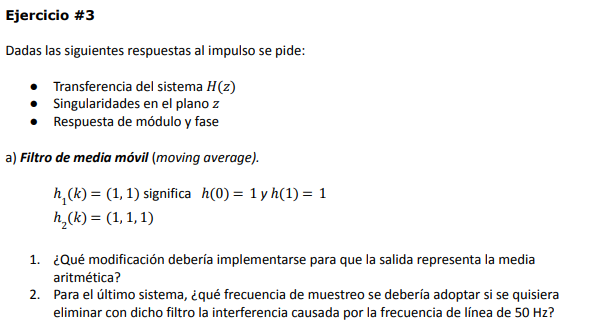

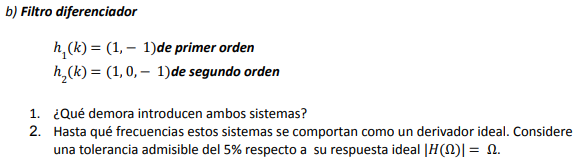

#### Desarrollo

In [32]:
from IPython.display import IFrame
IFrame("./docs/Ejercicio3_TS7.pdf", width=950, height=1000)

#### 3 a)

1 - ¿Qué modificación debería implementarse para que la salida representa la media
aritmética?

Se debería pesar a las muestras que componen a la respuesta al impulso por 1/N. Siendo N el número de muestras.

2 - Para el último sistema, ¿qué frecuencia de muestreo se debería adoptar si se quisiera
eliminar con dicho filtro la interferencia causada por la frecuencia de línea de 50 Hz?

Teniendo en cuenta que cuando se elige una frecuencia de muestreo, se determina la frecuencia analogica máxima que se mapea en la digital, siendo que $f_s=2\times f_{max}$ y mapea en $\pi$. Se debería elegir una frecuencia de muestreo tal que la frecuencia de 50Hz caiga justo en los ceros del sistema. En este caso hay un cero con una fase de $2/3\pi$, por lo tanto:

\begin{equation}
\pi \rightarrow fs/2
\end{equation}


\begin{equation}
2/3 \pi \rightarrow 50Hz
\end{equation}

\begin{equation}
\Longrightarrow fs = 150Hz
\end{equation}



#### 3 b)

1 - ¿Qué demora introducen ambos sistemas?

El primer sistema introduce un retardo no entero igual a 1/2. Esto no es deseable ya que no se puede determinar con exactitud cuantos intervalos tardará en tener una respuesta a la salida. En cambio, el segundo sistema, tiene un retardo entero igual a 1, por lo que en este caso si se puede determinar que el sistéma tardará un intervalo en tener una salida disponible


2- ¿Hasta qué frecuencias estos sistemas se comportan como un derivador ideal? Considere una tolerancia admisible del 5% respecto a su respuesta ideal |𝐻(Ω)| = Ω.

El derivador ideal es una función lineal de la frecuencia, por lo que esto solo se cumplirá para muy bajas frecuencias teniendo en cuenta que ambas transferencias son senos. Por otro lado, como la transferencia del diferenciador de primer orden es medio semiciclo del seno, será aproximadamente lineal en gran parte de la transferencia, mientras que en diferenciador de segundo orden, al ser el semiciclo completo, solo será aproximadamente lineal para frecuencias muy bajas. Sin embargo, este tendrá una ventaja que es que filtrará altas frecuencias las cuales pueden entorpecer la diferenciación entre dos muestras.

#### Punto 2)

##### Consigna

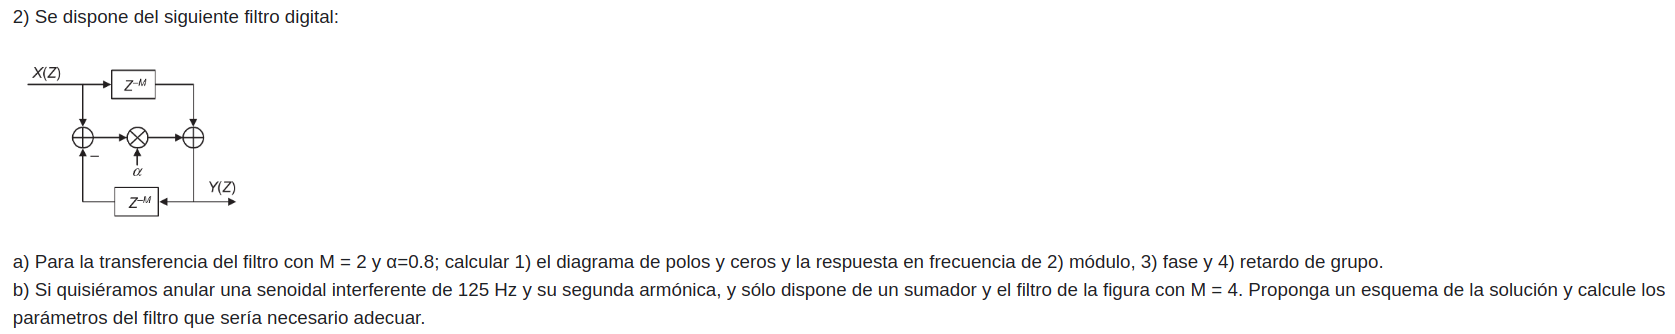

##### Desarrollo

In [33]:
from IPython.display import IFrame
IFrame("./docs/Punto2_TS7.pdf", width=950, height=1000)

##### Simulación en pyFDA

2a)

Diagrama de polos y ceros

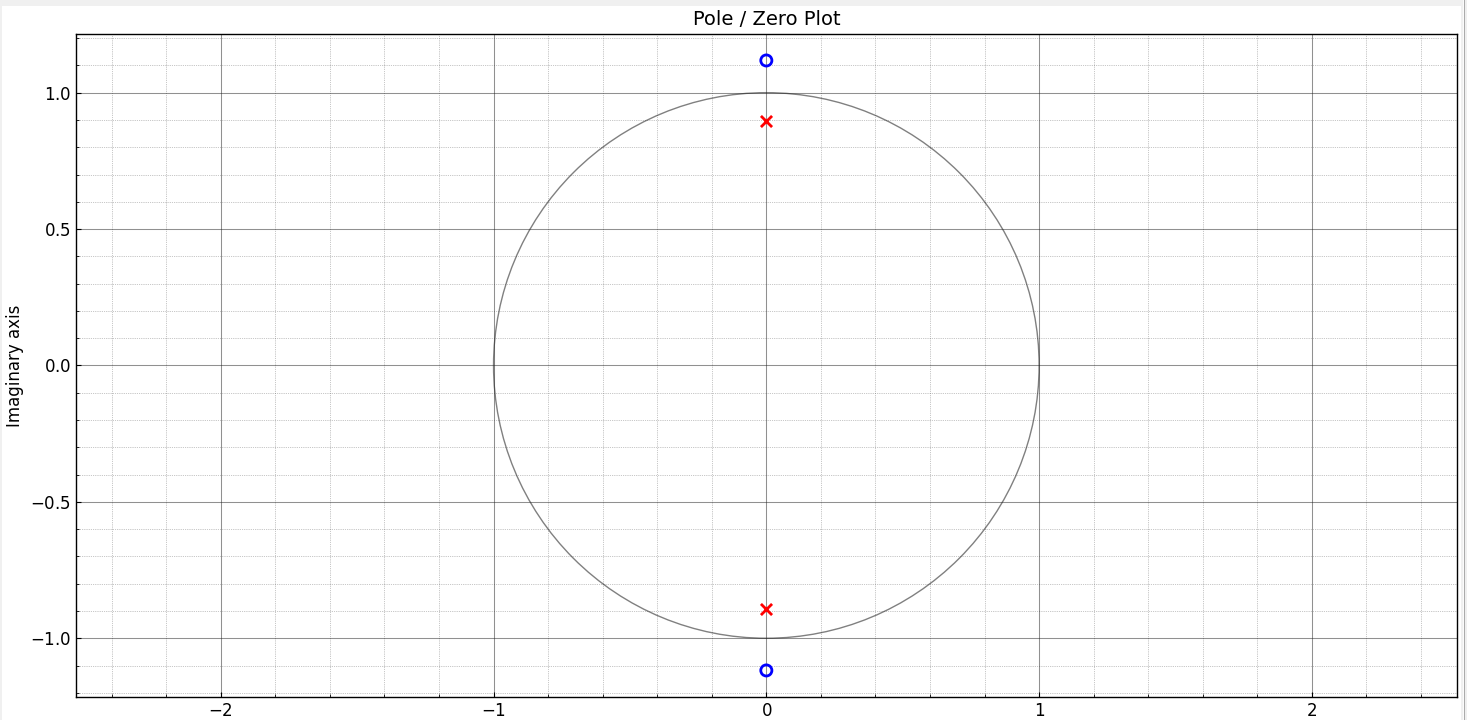

Módulo

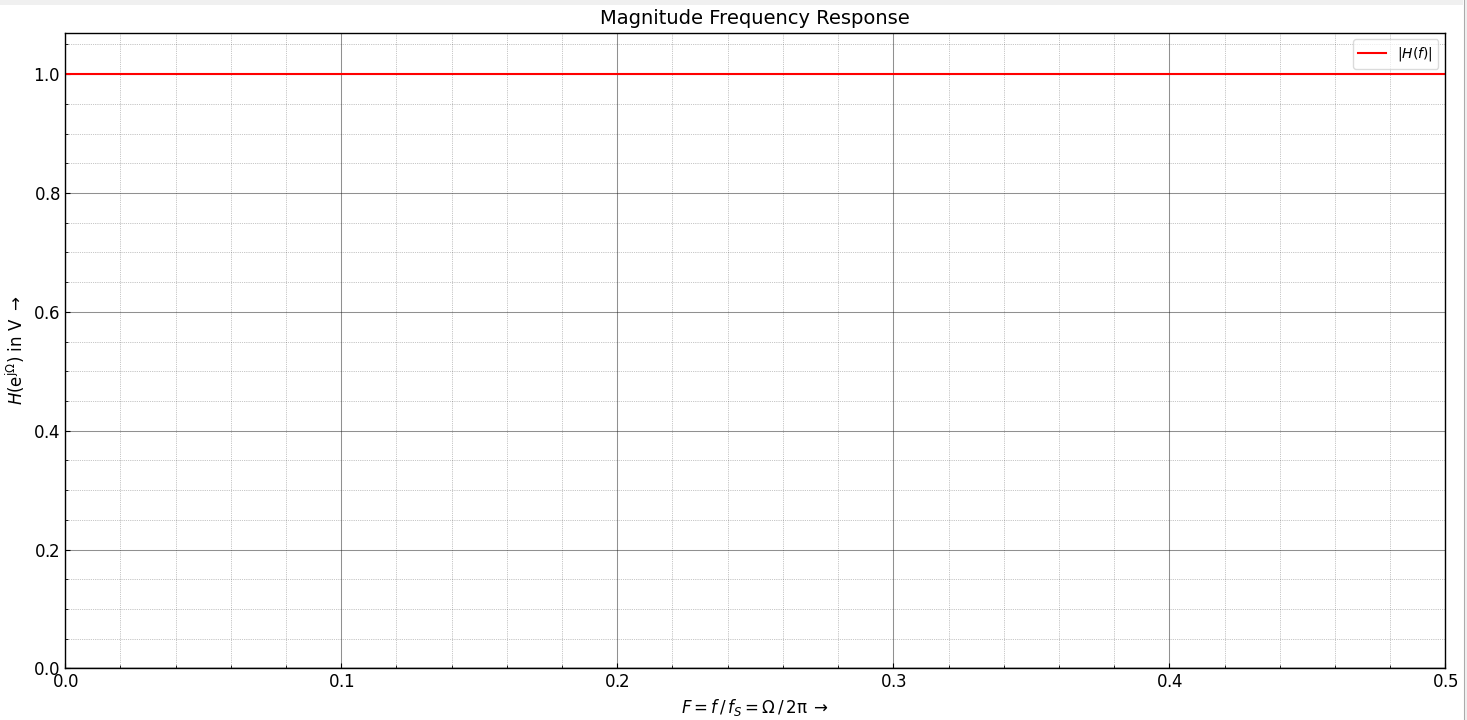

Fase

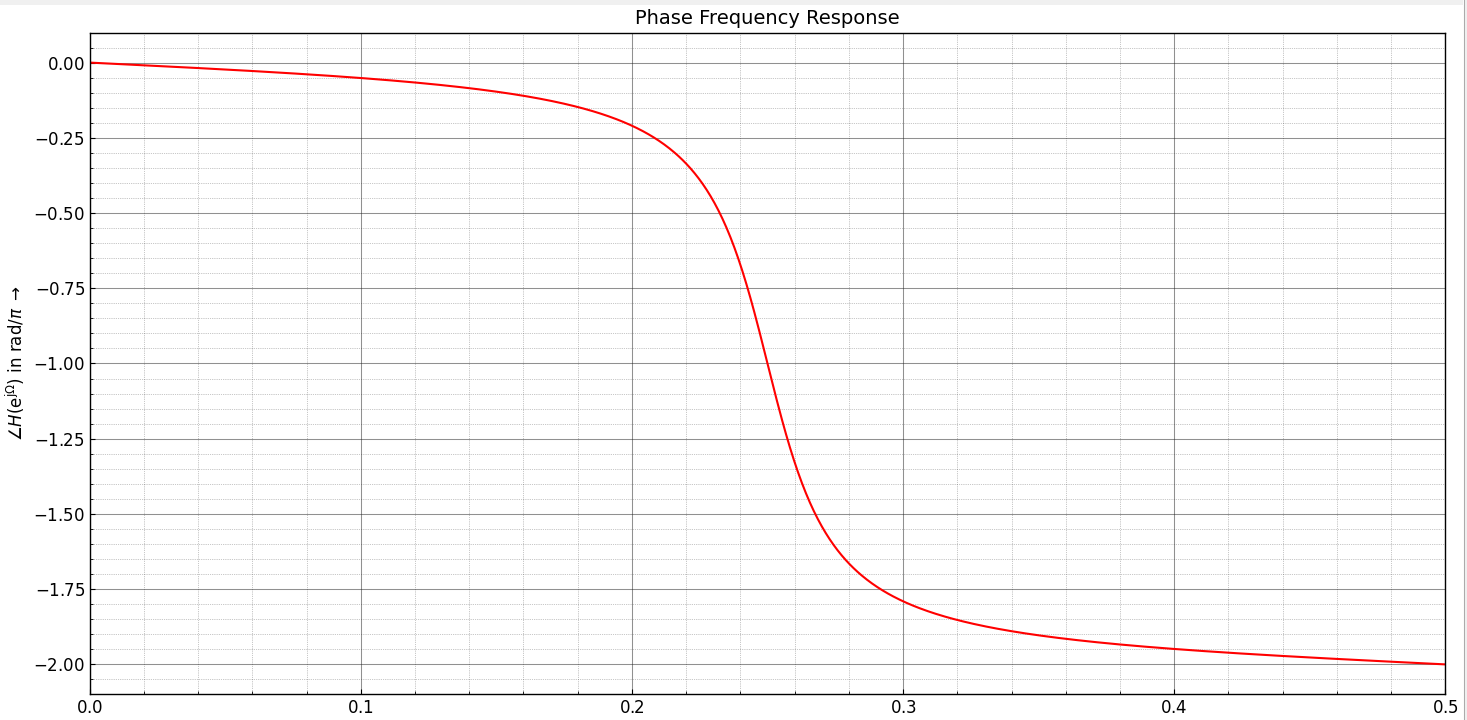

Retardo de grupo

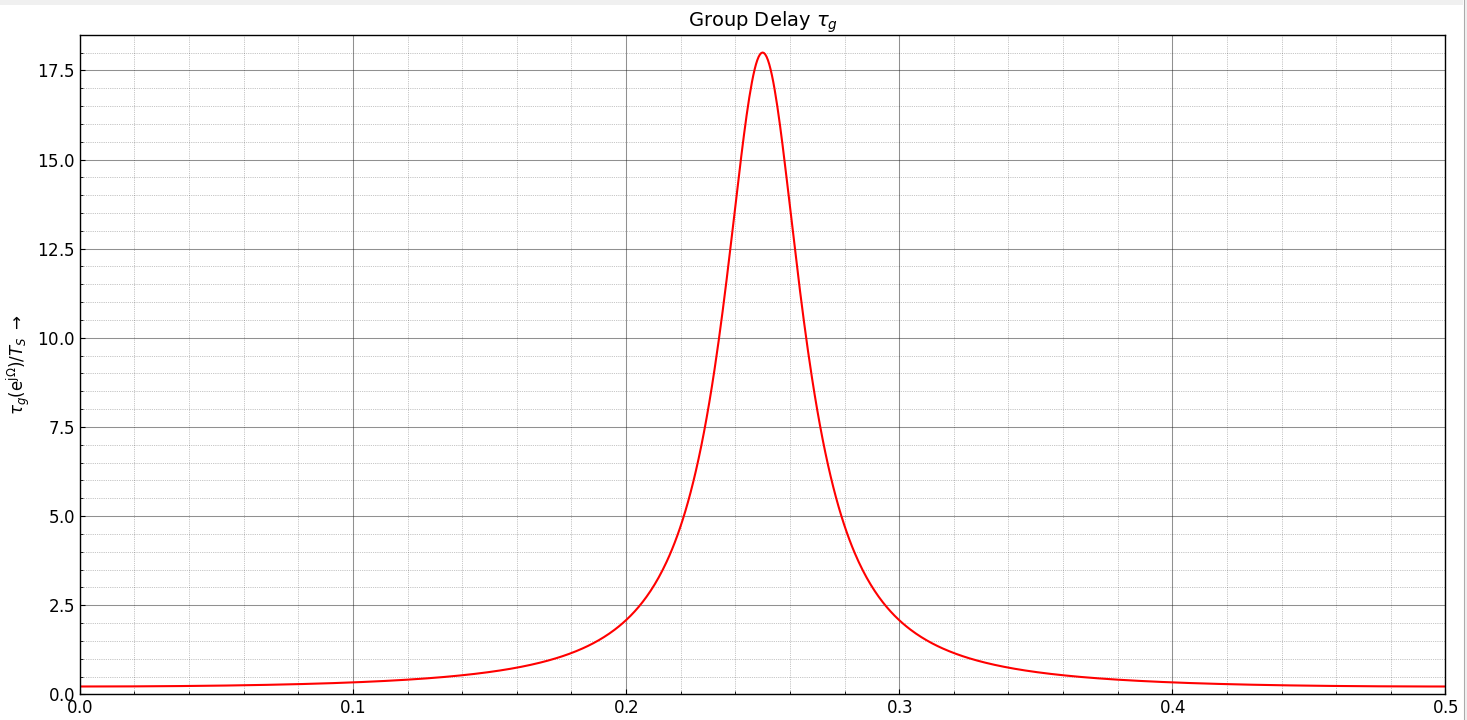


2b)

Diagrama de polos y ceros

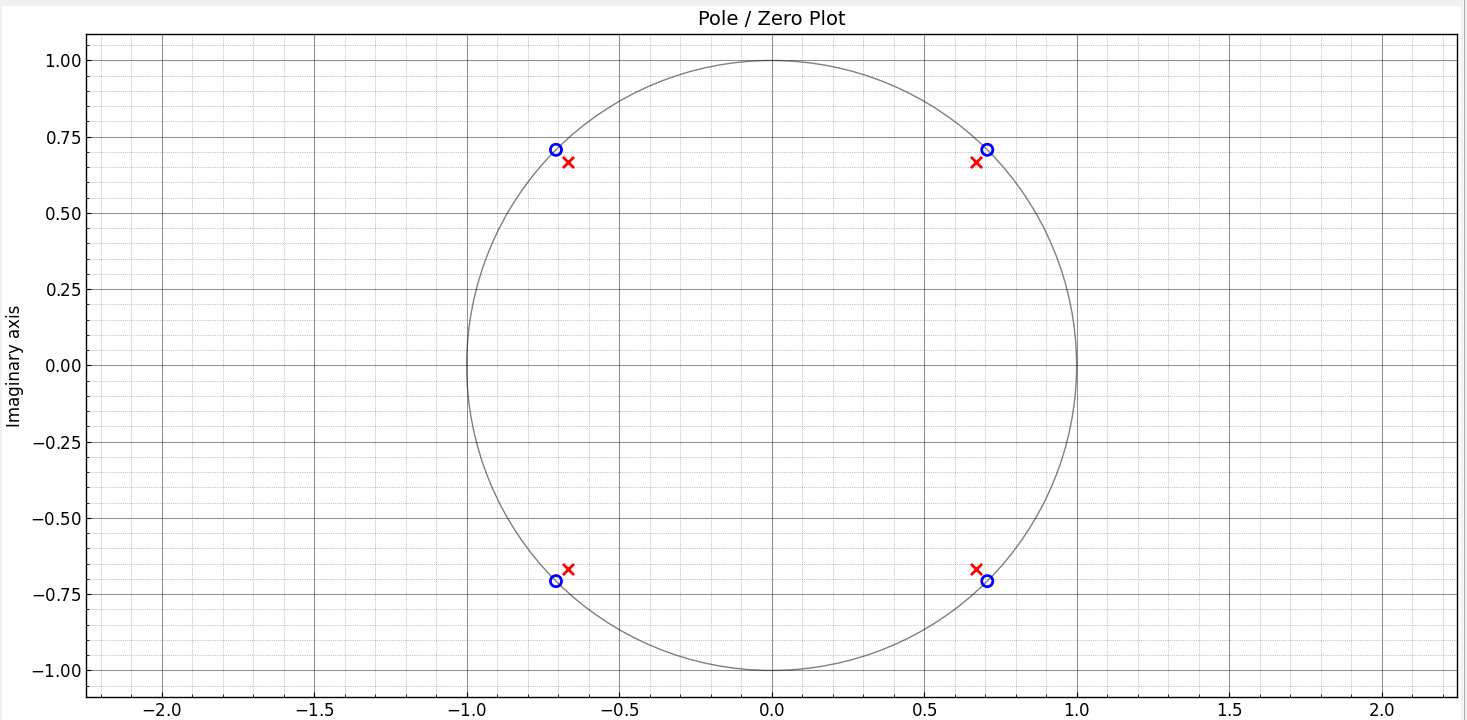

Módulo

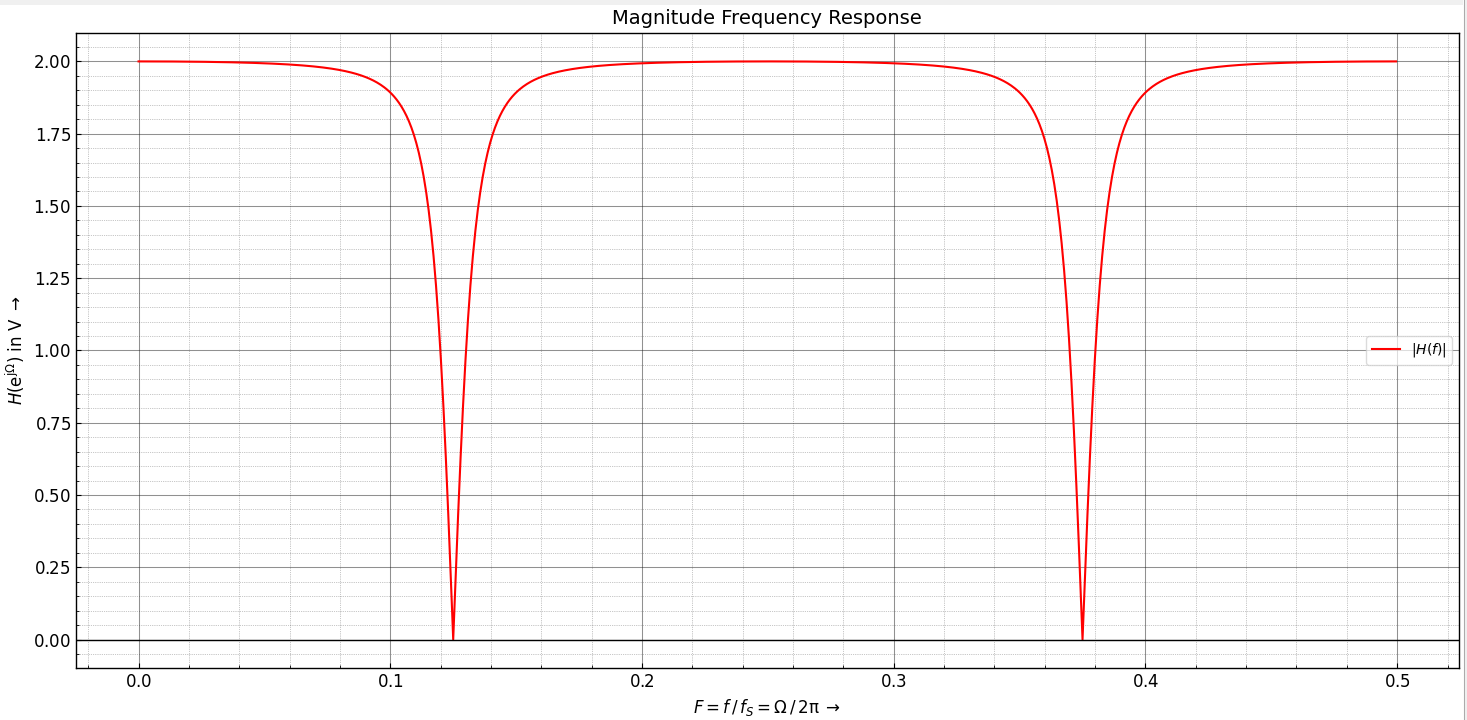

Fase

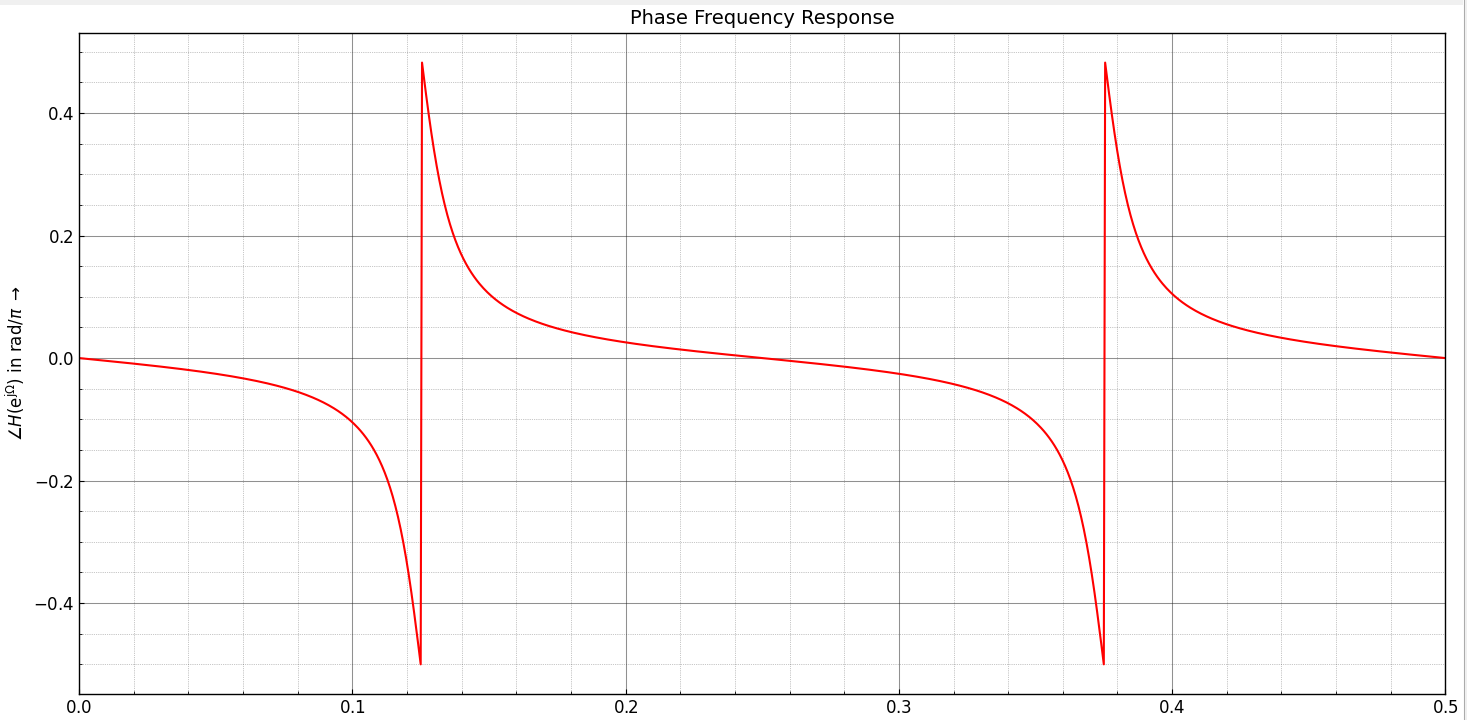

Retardo de grupo

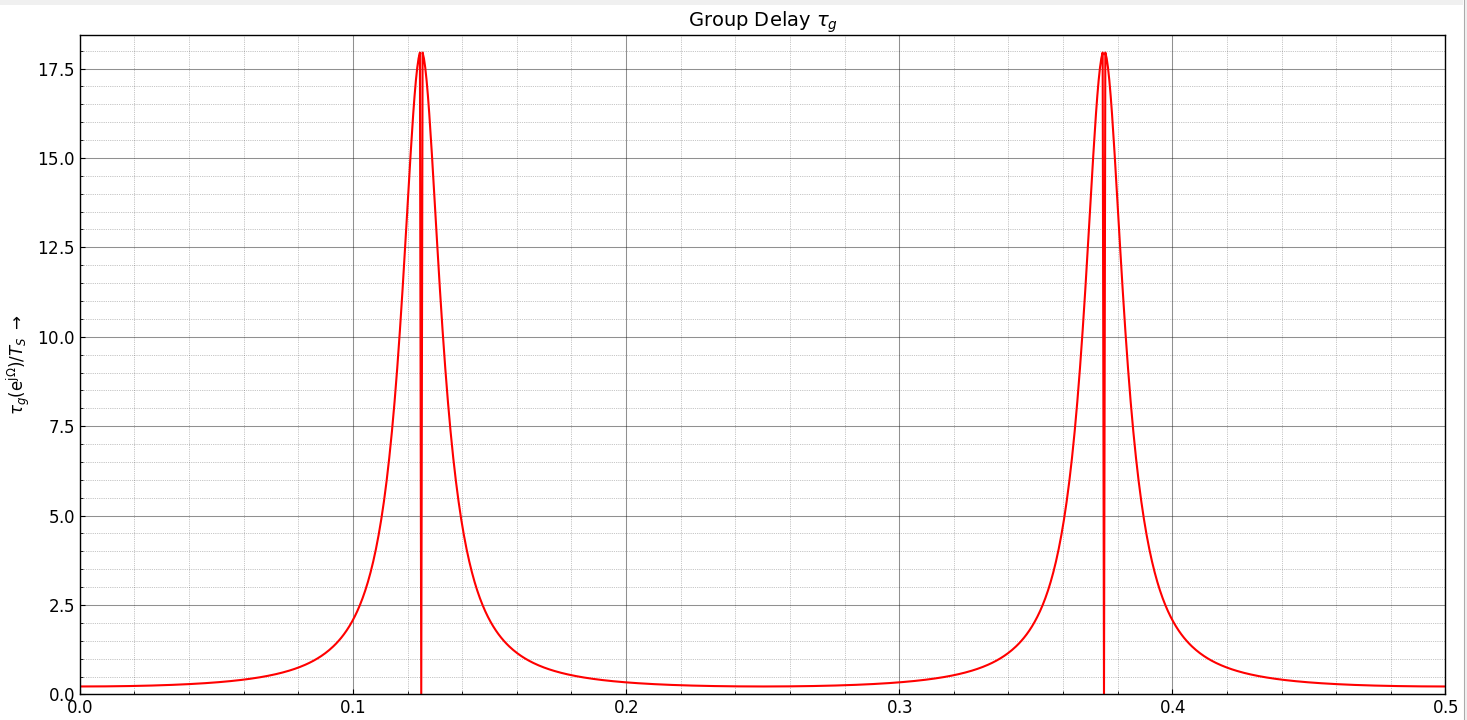



#### Conclusión

De este ejercicio se puede concluir que de la misma manera que en los filtros analógicos, se puede armar un elimina banda con un pasa todo y un sumador. Además, se observa que el retardo de grupo tanto del pasa todo como del elimina banda llega a un máximo a la misma frecuencia angular a la que se ubican los polos y ceros enfrentados.